In [ ]:
from numpy.random import default_rng

import matplotlib.pyplot as plt

import scanpy as sc
import squidpy as sq
from anndata import AnnData

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

scanpy==1.9.6 anndata==0.9.2 umap==0.5.1 numpy==1.23.5 scipy==1.10.1 pandas==2.0.3 scikit-learn==1.3.2 statsmodels==0.14.1 igraph==0.10.8 louvain==0.8.1 pynndescent==0.5.11
squidpy==1.2.2


In [ ]:
adata = sc.read_h5ad('/home/julia/spatial_1/e16_ALL/E16.5_E2S2.MOSTA.h5ad')

In [ ]:
adata

AnnData object with n_obs × n_vars = 73922 × 27762
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'annotation', 'Regulon - Ahr', 'Regulon - Alx1', 'Regulon - Arid5a', 'Regulon - Arnt', 'Regulon - Arnt2', 'Regulon - Atf1', 'Regulon - Atf2', 'Regulon - Atf3', 'Regulon - Atf4', 'Regulon - Atf6', 'Regulon - Atf7', 'Regulon - Bach2', 'Regulon - Barhl2', 'Regulon - Bcl11a', 'Regulon - Bcl6', 'Regulon - Bclaf1', 'Regulon - Bdp1', 'Regulon - Bhlhe23', 'Regulon - Bhlhe40', 'Regulon - Bhlhe41', 'Regulon - Bmyc', 'Regulon - Borcs8', 'Regulon - Brf1', 'Regulon - Brf2', 'Regulon - Cbfb', 'Regulon - Cdx4', 'Regulon - Cebpa', 'Regulon - Cebpb', 'Regulon - Cebpd', 'Regulon - Cebpe', 'Regulon - Cebpg', 'Regulon - Cebpz', 'Regulon - Cenpb', 'Regulon - Chd1', 'Regulon - Churc1', 'Regulon - Clock', 'Regulon - Cpeb1', 'Regulon - Creb1', 'Regulon - Creb3', 'Regulon - Creb3l1', 'Regulon - Creb3l2', 'Regulon - Crem', 'Regulon - Ctcf', 'Regulon - Cux1', 'Regulon 

In [ ]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)
adata

AnnData object with n_obs × n_vars = 73922 × 27762
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'annotation', 'Regulon - Ahr', 'Regulon - Alx1', 'Regulon - Arid5a', 'Regulon - Arnt', 'Regulon - Arnt2', 'Regulon - Atf1', 'Regulon - Atf2', 'Regulon - Atf3', 'Regulon - Atf4', 'Regulon - Atf6', 'Regulon - Atf7', 'Regulon - Bach2', 'Regulon - Barhl2', 'Regulon - Bcl11a', 'Regulon - Bcl6', 'Regulon - Bclaf1', 'Regulon - Bdp1', 'Regulon - Bhlhe23', 'Regulon - Bhlhe40', 'Regulon - Bhlhe41', 'Regulon - Bmyc', 'Regulon - Borcs8', 'Regulon - Brf1', 'Regulon - Brf2', 'Regulon - Cbfb', 'Regulon - Cdx4', 'Regulon - Cebpa', 'Regulon - Cebpb', 'Regulon - Cebpd', 'Regulon - Cebpe', 'Regulon - Cebpg', 'Regulon - Cebpz', 'Regulon - Cenpb', 'Regulon - Chd1', 'Regulon - Churc1', 'Regulon - Clock', 'Regulon - Cpeb1', 'Regulon - Creb1', 'Regulon - Creb3', 'Regulon - Creb3l1', 'Regulon - Creb3l2', 'Regulon - Crem', 'Regulon - Ctcf', 'Regulon - Cux1', 'Regulon 

/home/julia/miniconda3/envs/st/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


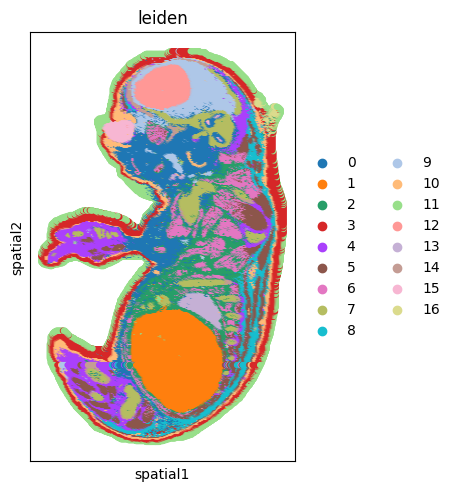

In [ ]:
sq.pl.spatial_scatter(adata, shape=None, color="leiden", size=50)

In [ ]:
import numpy as np

In [ ]:
# Extract spatial coordinates
spatial_coords = adata.obsm["spatial"]

# Get y-coordinate range
y_min, y_max = np.min(spatial_coords[:, 1]), np.max(spatial_coords[:, 1])

# Compute the thresholds for dividing into three parts
y_threshold_1 = y_min + (y_max - y_min) / 3  # Lower third boundary
y_threshold_2 = y_min + 2 * (y_max - y_min) / 3  # Upper third boundary

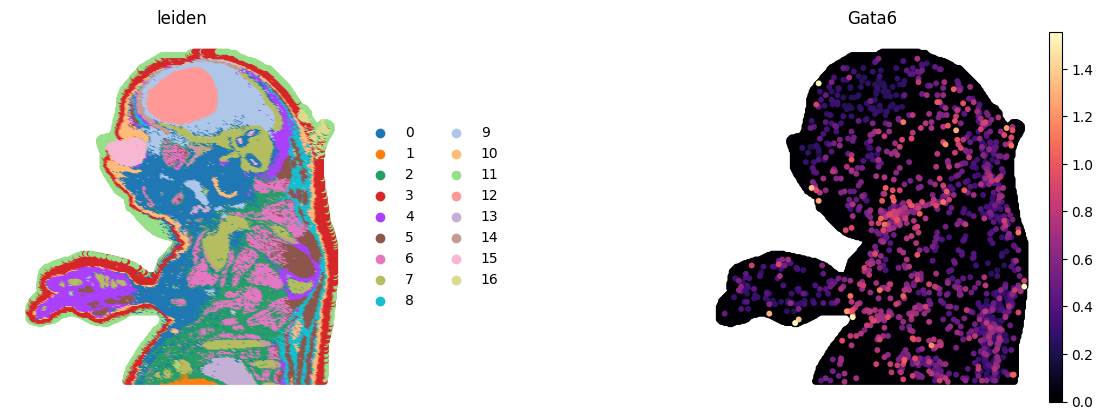

In [ ]:
# Select spots in the top two-thirds
top_two_thirds_mask = spatial_coords[:, 1] < y_threshold_2  # Keep middle and top parts

# Create a new AnnData object
adata_top_two_thirds = adata[top_two_thirds_mask].copy()

# Plot the selected portion
sc.pl.spatial(adata_top_two_thirds, color=["leiden", "Gata6"], spot_size=5, color_map='magma', frameon=False)

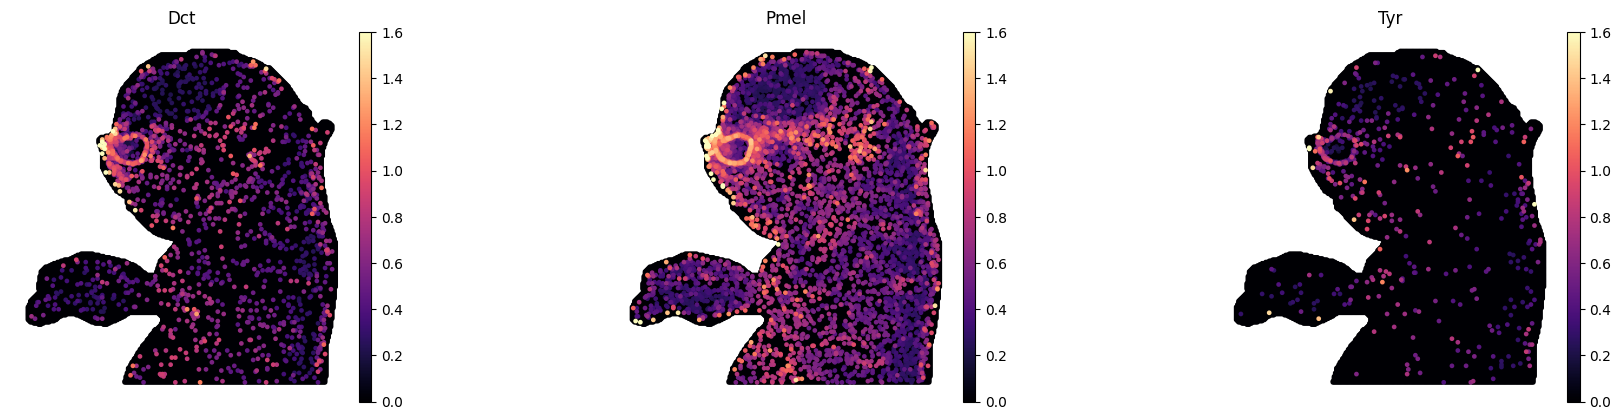

In [ ]:
sc.pl.spatial(adata_top_two_thirds, color=["Dct", "Pmel", 'Tyr'], spot_size=4, color_map='magma', frameon=False, vmax=1.6)

In [ ]:
# Compute the y-coordinate midpoint
y_midpoint = np.median(spatial_coords[:, 1])  # Second column is y-coordinates
y_midpoint

-224.0

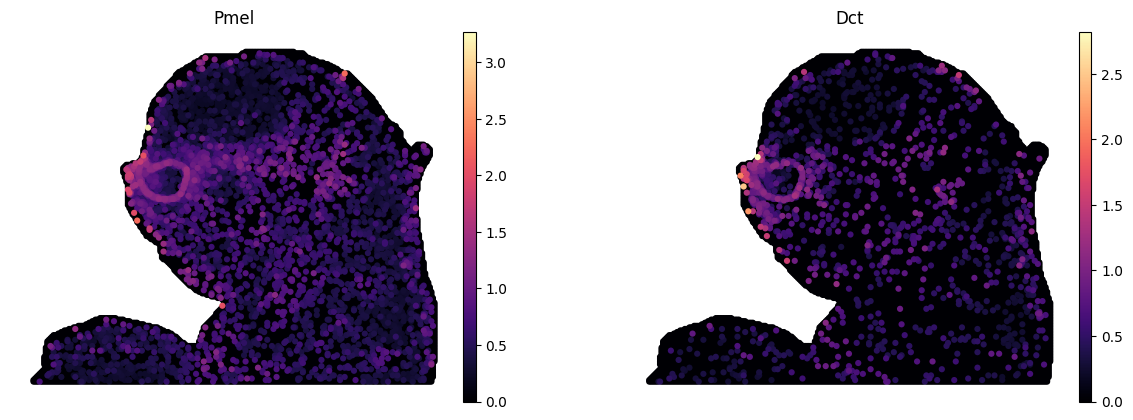

In [ ]:
# Keep only spots where the y-coordinate is above the midpoint
upper_half_mask = spatial_coords[:, 1] < y_midpoint  # Adjust sign if needed

# Create a new AnnData object with only the upper part
adata_upper = adata[upper_half_mask].copy()

# Plot the cropped upper part
sc.pl.spatial(adata_upper, color=["Pmel", "Dct"], spot_size=4, color_map='magma', frameon=False)

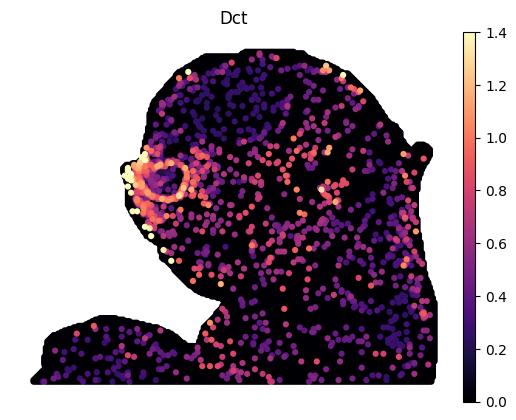

In [ ]:
sc.pl.spatial(
    adata_upper,
    color=["Dct"],
    spot_size=4,
    color_map='magma',
    frameon=False,
    save="Dct.pdf" ,
    vmax=1.4 # Saves the file in the default Scanpy figure directory
)


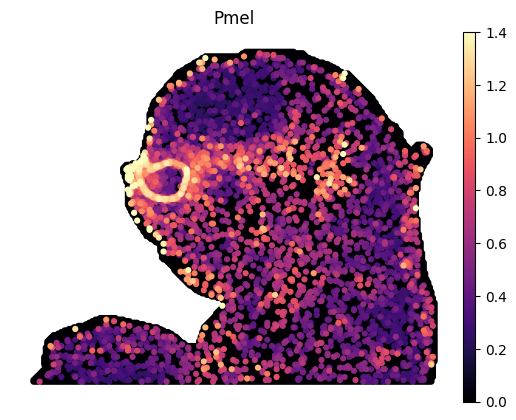

In [ ]:
sc.pl.spatial(
    adata_upper,
    color=[ "Pmel"],
    spot_size=4,
    color_map='magma',
    frameon=False,
    save="Pmel.pdf",
     vmax=1.4 # Saves the file in the default Scanpy figure directory
)

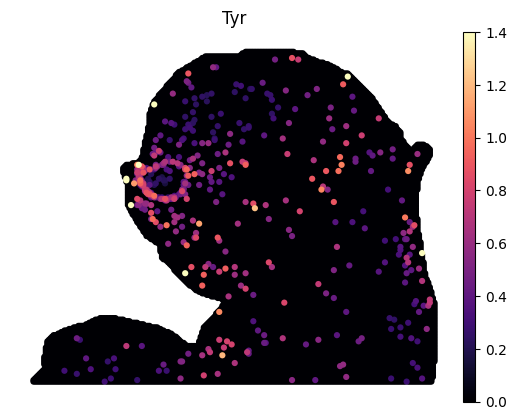

In [ ]:
sc.pl.spatial(
    adata_upper,
    color=['Tyr'],
    spot_size=4,
    color_map='magma',
    frameon=False,
    save="Tyr.pdf" ,
     vmax=1.4 # Saves the file in the default Scanpy figure directory
)

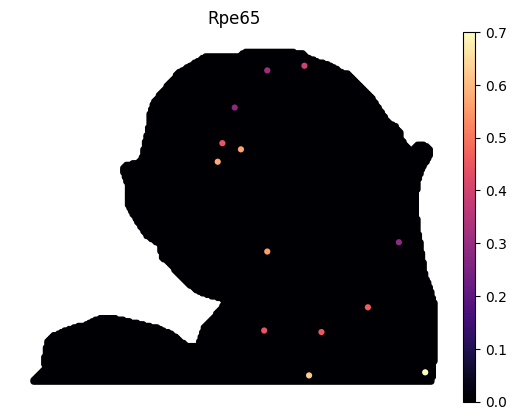

In [ ]:
sc.pl.spatial(
    adata_upper,
    color=[ "Rpe65"],
    spot_size=4,
    color_map='magma',
    frameon=False,
 save="Rpe.p",
     vmax=0.7 # Saves the file in the default Scanpy figure directory
)


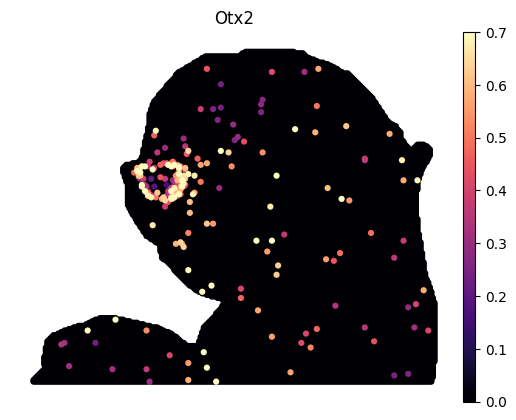

In [ ]:
sc.pl.spatial(
    adata_upper,
    color=[ "Otx2"],
    spot_size=4,
    color_map='magma',
    frameon=False,
 save="Otx2.pdf",
     vmax=0.7 # Saves the file in the default Scanpy figure directory
)


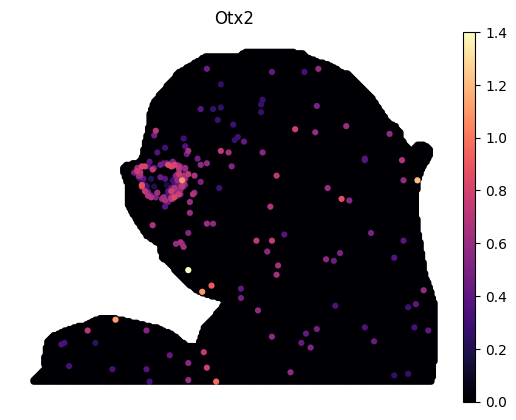

In [ ]:
sc.pl.spatial(
    adata_upper,
    color=[ "Otx2"],
    spot_size=4,
    color_map='magma',
    frameon=False,
    save="Otx2.svg",
     vmax=1.4 # Saves the file in the default Scanpy figure directory
)

In [ ]:
sc.pl.spatial(adata_upper, color='score_RPE', spot_size=4, color_map='magma', vmax=0.15)

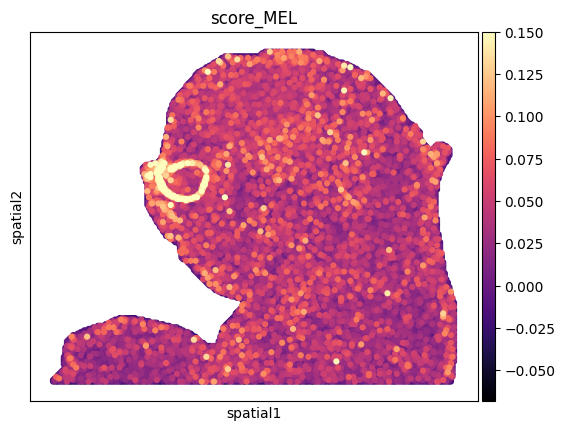

In [ ]:
## Melano_g
melano_g = ["Gjb6", "Mlph", "Slc4a5", "Syt4", "Cited1", "Fmn1", "Gjb2", "Myo5a", "Ednrb",
         "S100b", "Mgll", "Scn8a", "Tecpr1", "Cdk2", "Mlana", "Lbh", "Cyb5a", "Syngr1", "Spp1",
         "Stmn3", "Cck", "Dkk3", "Fabp3", "Atp1a1", "Slc24a5", "Tyr", "Slc45a2", "Rab38", "Pmel",
         "Tyrp1", "Gpnmb", "Trpm1", "Gsta4", "Dct", "Neat1", "Gstp1"]
sc.tl.score_genes(adata_upper,
                  melano_g, ctrl_size=50, gene_pool=None, n_bins=25, score_name='score_MEL',)
sc.pl.spatial(adata_upper, color='score_MEL', spot_size=4, color_map='magma', vmax=0.15)

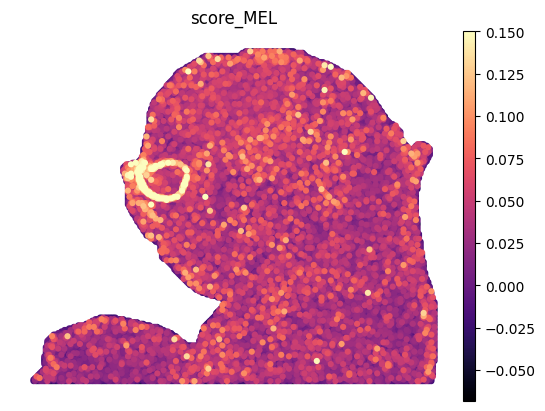

In [ ]:
sc.pl.spatial(adata_upper, color='score_MEL', spot_size=4, color_map='magma', vmax=0.15, frameon=False, save='scoreMEL.pdf')

In [ ]:
## Melano_g
melano_g = ["Gjb6", "Mlph", "Slc4a5", "Syt4", "Cited1", "Fmn1", "Gjb2", "Myo5a", "Ednrb",
         "S100b", "Mgll", "Scn8a", "Tecpr1", "Cdk2", "Mlana", "Lbh", "Cyb5a", "Syngr1", "Spp1",
         "Stmn3", "Cck", "Dkk3", "Fabp3", "Atp1a1", "Slc24a5", "Tyr", "Slc45a2", "Rab38", "Pmel",
         "Tyrp1", "Gpnmb", "Trpm1", "Gsta4", "Dct", "Neat1", "Gstp1"]
sc.tl.score_genes(adata_upper,
                  ctrl_size=50, gene_pool=None, n_bins=25, score_name='score_m',)
sc.pl.spatial(adata_upper, color='score_m', spot_size=4, color_map='magma', frameon=False)

TypeError: score_genes() missing 1 required positional argument: 'gene_list'

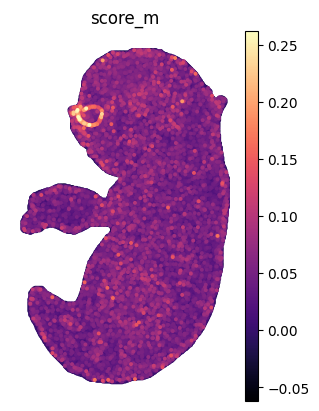

In [ ]:
sc.pl.spatial(adata, color='score_m', spot_size=5, color_map='magma',frameon=False, save='mel_score.svg')

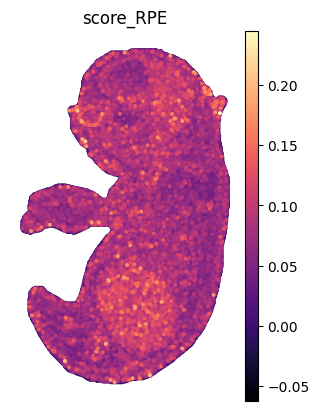

In [ ]:
sc.pl.spatial(adata, color='score_RPE', spot_size=5, color_map='magma',frameon=False, save='RPE1111_score.svg')

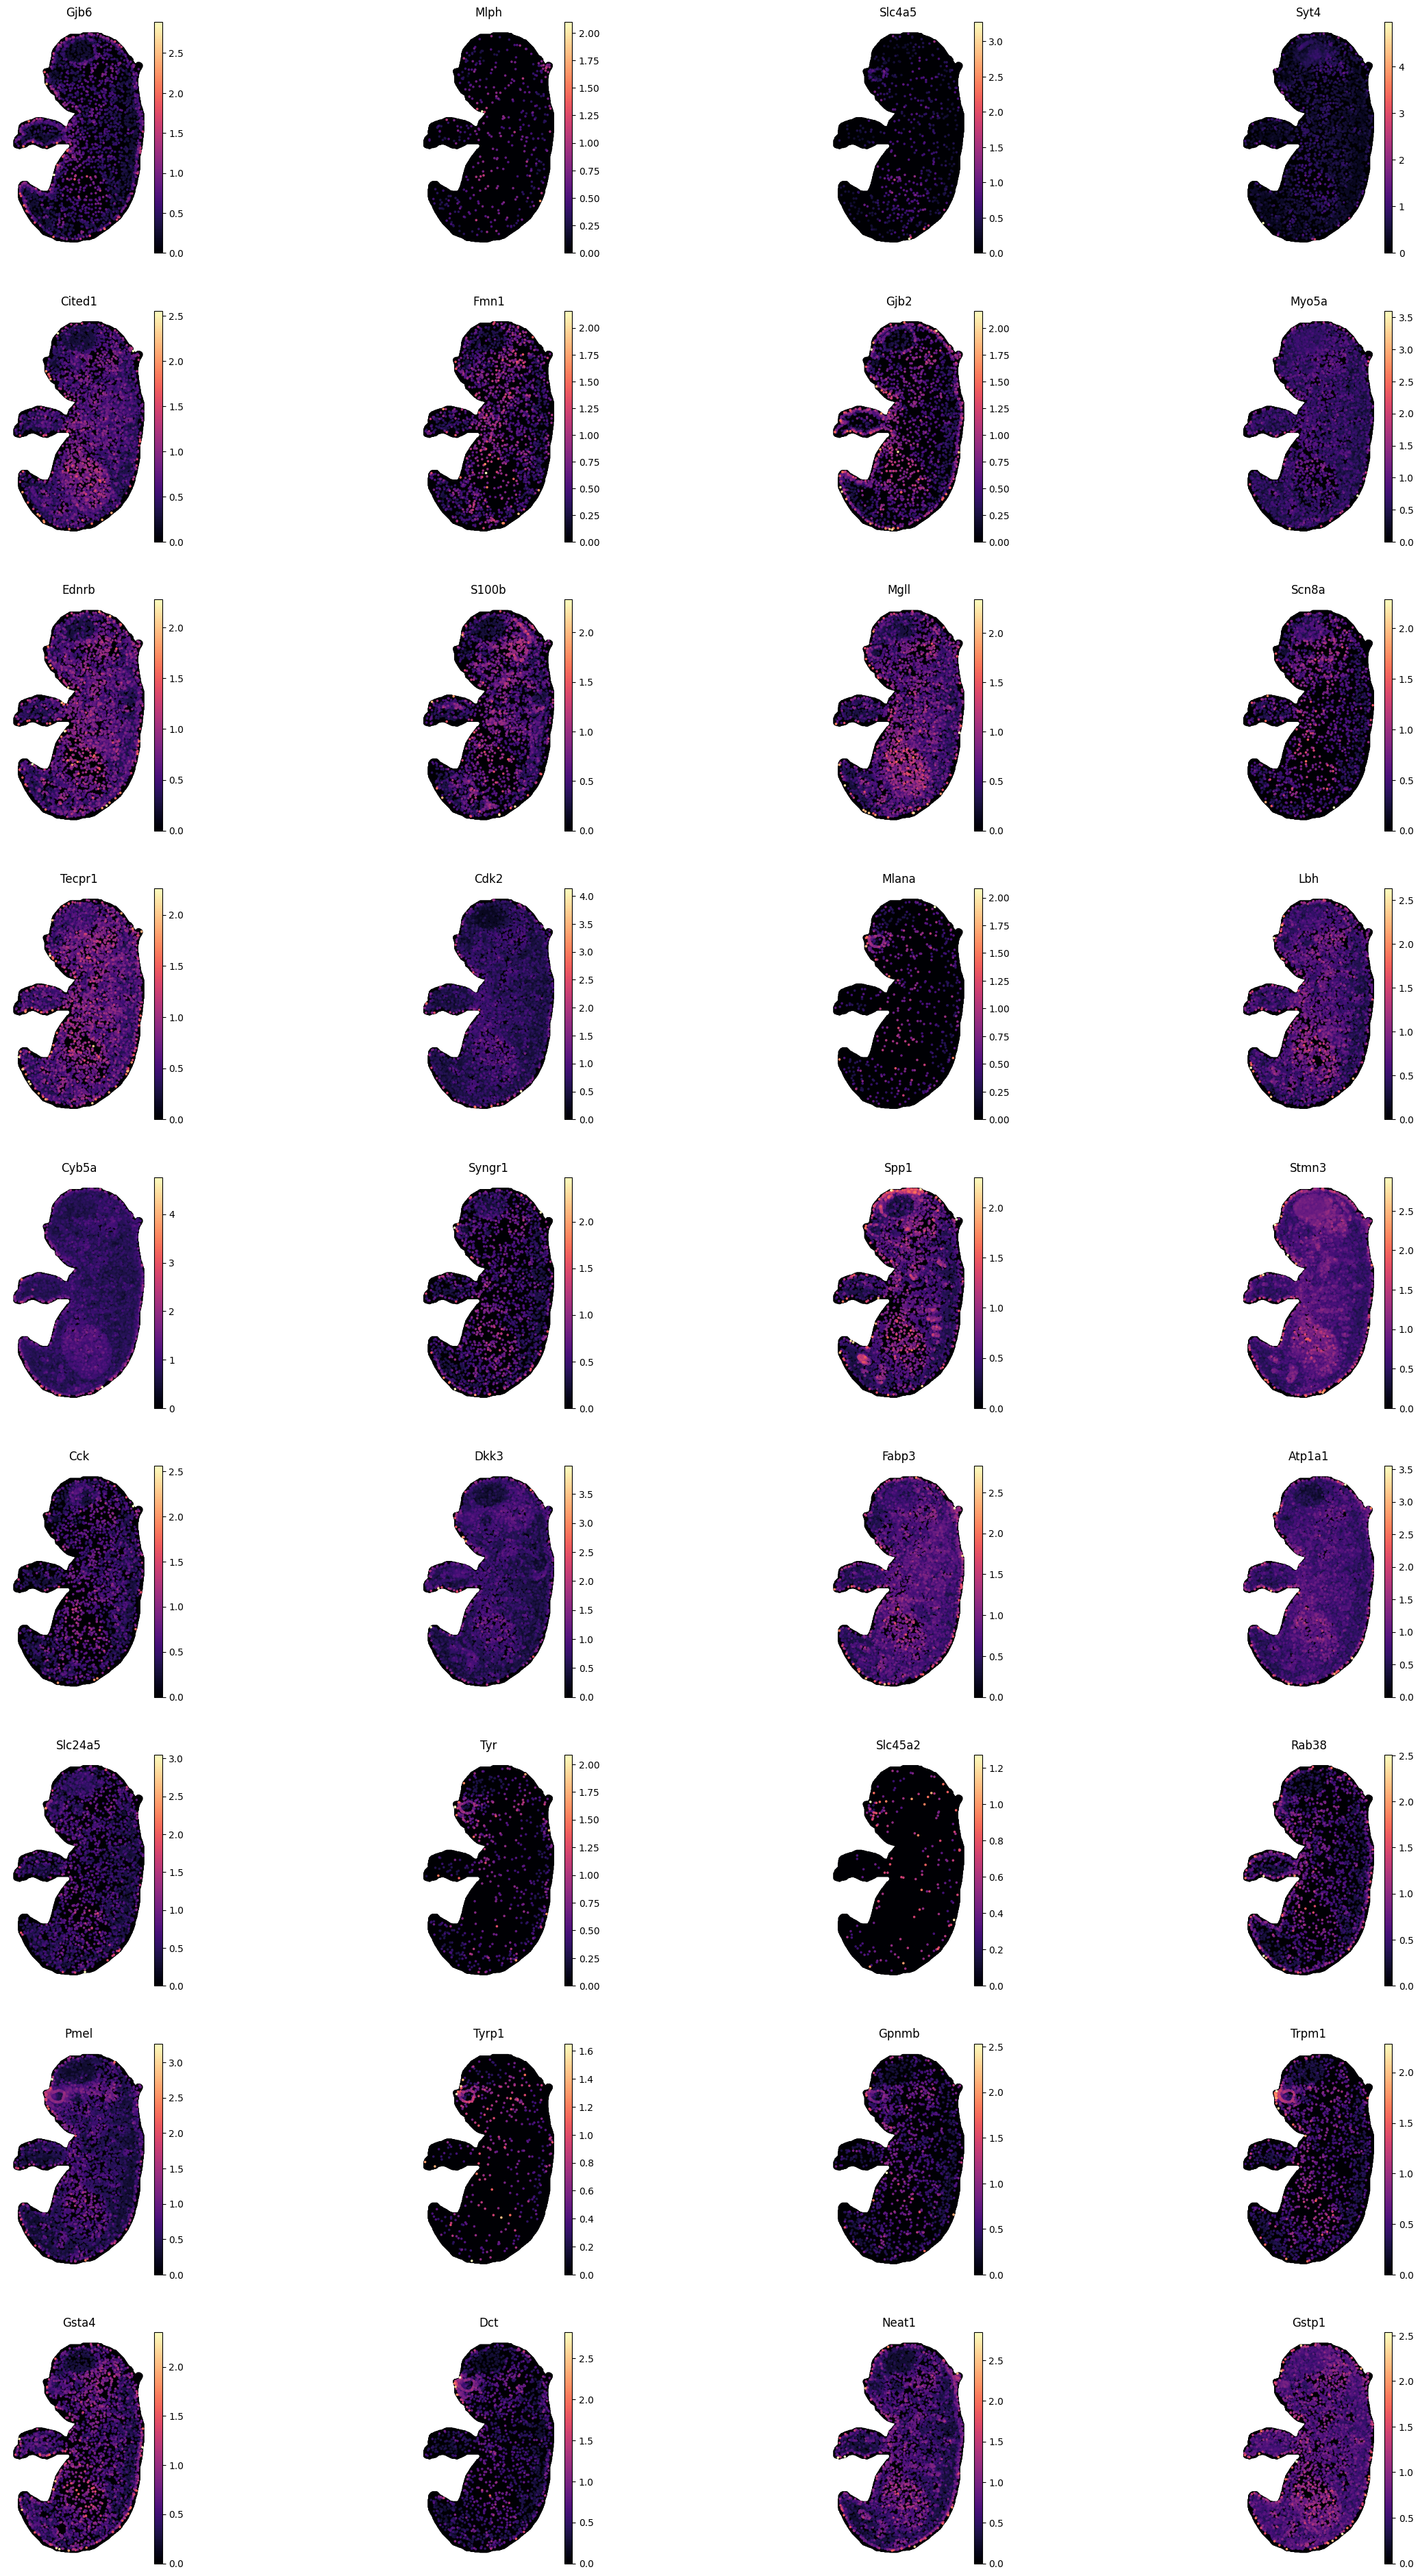

In [ ]:
sc.pl.spatial(adata, color=["Gjb6", "Mlph", "Slc4a5", "Syt4", "Cited1", "Fmn1", "Gjb2", "Myo5a", "Ednrb",
         "S100b", "Mgll", "Scn8a", "Tecpr1", "Cdk2", "Mlana", "Lbh", "Cyb5a", "Syngr1", "Spp1",
         "Stmn3", "Cck", "Dkk3", "Fabp3", "Atp1a1", "Slc24a5", "Tyr", "Slc45a2", "Rab38", "Pmel",
         "Tyrp1", "Gpnmb", "Trpm1", "Gsta4", "Dct", "Neat1", "Gstp1"], spot_size=5, color_map='magma', frameon=False)

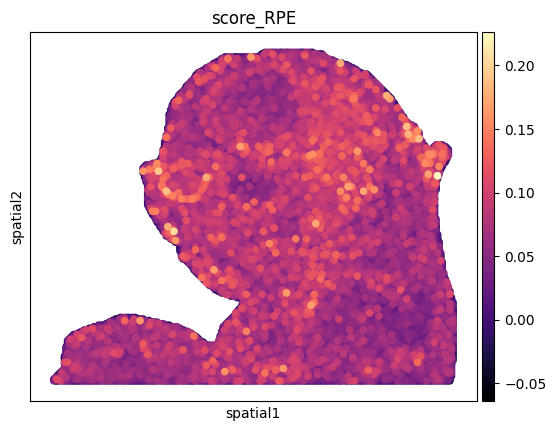

In [ ]:
### RPE
RPE_g = [ "Pon1", "Mt3", "Slc24a1", "Acsl6", "Slc1a1", "Rd3l",
               "Col4a4", "Lrat", "Tmem56", "Ermn", "Rpe65", "Slc6a13", "Rgr",
               "Ttr", "Rdh5", "Itgb8", "Slc16a8", "Cspg5", "Inpp5k", "Rlbp1",
               "Enpp2", "Abhd2", "Col9a3", "Ezr", "Arl6ip1", "Otx2", "Krt18",
               "Stra6", "Rdh10", "Atp1b1", "Trpm3", "Slc2a1", "Basp1", "Cst3",
               "Bsg", "Tmem98", "Clu", "Rbp1"]
sc.tl.score_genes(adata_upper,
                  RPE_g, ctrl_size=50, gene_pool=None, n_bins=25, score_name='score_RPE',)
sc.pl.spatial(adata_upper, color='score_RPE', spot_size=4, color_map='magma', vmax=0.15)

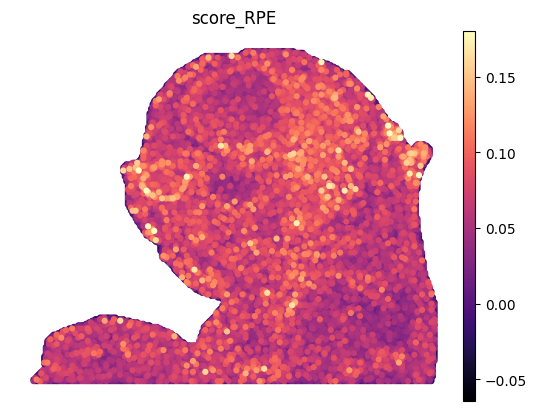

In [ ]:
sc.pl.spatial(adata_upper, color='score_RPE', spot_size=4, color_map='magma', vmax=0.18, frameon=False, save='RPE_score.pdf')